In [1]:
#Importing library that will be useful for analysis 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline
import os
import seaborn as sns
from nltk.corpus import wordnet
import nltk    
import string
from nltk import pos_tag
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')#error handling if stopwords package doesnt exist
nltk.download('averaged_perceptron_tagger')#error handling if averaged_perceptron_tagger package doesnt exist
nltk.download('wordnet')#error handling if wordnet package doesnt exist
from pandas.api.types import CategoricalDtype
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Setting directory as files are not in default jupyter directory
os.chdir('/Users/deogakofi-ofuafor/Documents/Data Science/blog/AirBnB_seattle')
print(os.getcwd())

#Loading the datasets from csv to panda dataframe
calender = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')



[nltk_data] Downloading package stopwords to /Users/deogakofi-
[nltk_data]     ofuafor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/deogakofi-ofuafor/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/deogakofi-
[nltk_data]     ofuafor/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/Users/deogakofi-ofuafor/Documents/Data Science/Blog/seattle


In [2]:
#Previewing the calender dataframe
calender.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
#Previewing the listings dataframe
listings.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
#Previewing the reviews dataframe
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [5]:
#Exploring all columns in the calender dataframe
calender.describe(include='all')

,listing_id,date,available,price
count,1.393570e+06,1393570,1393570,934542
unique,NaN,365,2,669
top,NaN,2016-07-08,t,$150.00
freq,NaN,3818,934542,36646
mean,5.550111e+06,NaN,NaN,NaN
std,2.962274e+06,NaN,NaN,NaN
min,3.335000e+03,NaN,NaN,NaN
25%,3.258213e+06,NaN,NaN,NaN
50%,6.118244e+06,NaN,NaN,NaN
75%,8.035212e+06,NaN,NaN,NaN


In [6]:
#Exploring all columns in the listings dataframe
listings.describe(include='all')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3818,3.818000e+03,3818,3818,3641,3249,3818,3818,2786,...,3162.000000,3818,0.0,3818,3818,3818,3818,3818,3818.000000,3191.000000
unique,NaN,3818,NaN,1,3792,3478,3119,3742,1,2506,...,NaN,1,NaN,1,2,3,2,2,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/7969698,NaN,2016-01-04,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,Wallingford is a mostly-residential neighborho...,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,NaN,NaN
freq,NaN,1,NaN,3818,3,15,14,10,3818,17,...,NaN,3818,NaN,3818,3227,1417,3497,3443,NaN,NaN
mean,5.550111e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.452245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.946307,2.078919
std,2.962660e+06,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.750259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.893029,1.822348
min,3.335000e+03,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.020000
25%,3.258256e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.695000
50%,6.118244e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.540000
75%,8.035127e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,3.000000


In [7]:
#Exploring all columns in the reviews dataframe
reviews.describe(include='all')

,listing_id,id,date,reviewer_id,reviewer_name,comments
count,8.484900e+04,8.484900e+04,84849,8.484900e+04,84849,84831
unique,NaN,NaN,1930,NaN,14380,84136
top,NaN,NaN,2015-09-21,NaN,David,The host canceled this reservation the day bef...
freq,NaN,NaN,580,NaN,870,57
mean,3.005067e+06,3.058765e+07,NaN,1.701301e+07,NaN,NaN
std,2.472877e+06,1.636613e+07,NaN,1.353704e+07,NaN,NaN
min,4.291000e+03,3.721000e+03,NaN,1.500000e+01,NaN,NaN
25%,7.946330e+05,1.725127e+07,NaN,5.053141e+06,NaN,NaN
50%,2.488228e+06,3.228809e+07,NaN,1.413476e+07,NaN,NaN
75%,4.694479e+06,4.457648e+07,NaN,2.762402e+07,NaN,NaN


In [8]:
#Checking for percentage of missing values in the price column in the calender dataframe
print('Percentage of missing values in price column:', calender['price'].isnull().mean()) # missing values

Percentage of missing values in price column: 0.32938998399793334


In [9]:
#Keeping rows in price where the value is not null and creating a new dataframe with that criteria
calender_with_price = calender[calender['price'].notnull()]

In [10]:
#Exploring the date field in the calender dataset
calender_with_price.date.describe()

count         934542
unique           365
top       2017-01-01
freq            2922
Name: date, dtype: object

In [11]:
#Converting the datefield to datetime type from an object type

calender_with_price['date'] = pd.to_datetime(calender_with_price['date'])

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
#Confirming the date field has changed to datetime64 field
calender_with_price.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                 object
dtype: object

In [13]:
#Setting the index of the calender dataframe to 'date' column
calender_with_price = calender_with_price.set_index('date')

In [14]:
#Confirming the index of the calender dataframe has changed to 'date' column
calender_with_price.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-13', '2016-01-14',
               '2016-01-18', '2016-01-19', '2016-01-20', '2016-01-24',
               '2016-01-25', '2016-01-26',
               ...
               '2016-06-28', '2016-06-29', '2016-06-30', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-10',
               '2016-01-11', '2016-01-12'],
              dtype='datetime64[ns]', name='date', length=934542, freq=None)

In [15]:
# Add columns with year, month, and weekday name and actual date to calender dataset
calender_with_price['year'] = calender_with_price.index.year
calender_with_price['month'] = calender_with_price.index.month
calender_with_price['day'] = calender_with_price.index.day
calender_with_price['weekday_name'] = calender_with_price.index.weekday_name
calender_with_price['actual_date'] = calender_with_price.index.date
# Display a random sampling of 5 rows
calender_with_price.sample(5, random_state=0)

,listing_id,available,price,year,month,day,weekday_name,actual_date
date,,,,,,,,
2016-05-25,3858725,t,$122.00,2016,5,25,Wednesday,2016-05-25
2016-02-05,9460,t,$119.00,2016,2,5,Friday,2016-02-05
2016-12-10,3052151,t,$70.00,2016,12,10,Saturday,2016-12-10
2016-06-20,3123632,t,$200.00,2016,6,20,Monday,2016-06-20
2016-06-06,6412566,t,$175.00,2016,6,6,Monday,2016-06-06


In [16]:
#Converting price column from string to a float type variable for easier analysis

calender_with_price['price']=calender_with_price['price'].str.replace('$', '').str.replace(',','').astype('float')

Text(0, 0.5, 'Price')

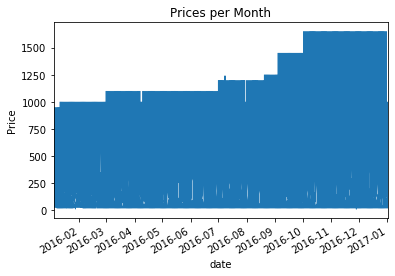

In [17]:
#plotting the price data in the calender_with_price dataset

calender_with_price['price'].plot(linewidth=0.5)
plt.title('Prices per Month')
plt.ylabel('Price')

Text(0.5, 1.0, 'Monthly price')

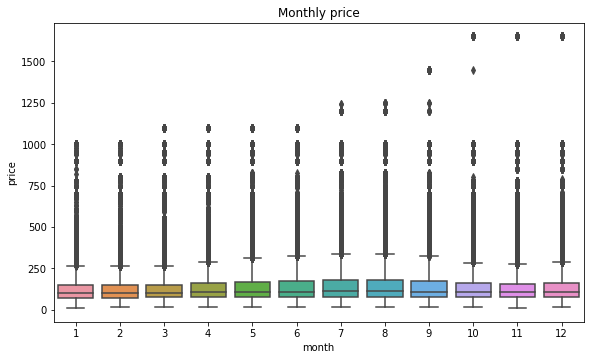

In [18]:
#Boxplot of monthly price 
plt.figure(figsize=(9.5,5.5))
sns.boxplot(data=calender_with_price, x='month', y="price")
plt.title('Monthly price')

In [19]:
#Finding the average price of listings per month in dataframe
calender_with_price.groupby(['month'])[['price']].mean()

,price
month,
1,122.912176
2,124.293927
3,128.644488
4,135.097005
5,139.538183
6,147.473137
7,152.094150
8,150.656594
9,143.255949


In [20]:
#Finding the percentage change of average listing prices per month
calender_with_price.groupby(['month'])[['price']].mean().pct_change().sort_values(by = 'price', ascending = False)

,price
month,
6,0.056866
4,0.050158
3,0.035002
5,0.032874
7,0.031335
12,0.011520
2,0.011242
8,-0.009452
11,-0.009802


Text(0, 0.5, 'pct_change')

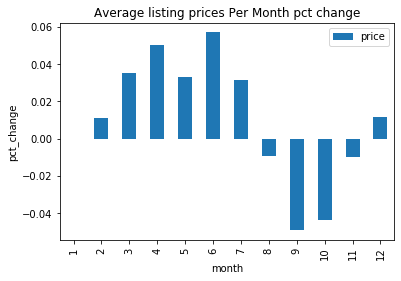

In [21]:
#Finding the percentage change of average listing prices per month

calender_with_price.groupby(['month'])[['price']].mean().pct_change().plot(kind = 'bar')
plt.title('Average listing prices Per Month pct change')
plt.ylabel('pct_change')

In [22]:
#Create dataframe with average price for each month in first quater of the year
q1_avg_per_month = calender_with_price[(calender_with_price['month'] == 1) | (calender_with_price['month'] == 2) | (calender_with_price['month'] == 3)].groupby(['month'])[['price']].mean()

#Print dataframe with average price for each month in first quater of the year
print(q1_avg_per_month)

#Print average listing price for the first quater
print('Average listing price for the first quater:', q1_avg_per_month['price'].mean())

            price
month            
1      122.912176
2      124.293927
3      128.644488
Average listing price for the first quater: 125.28353024032894


In [23]:
#Create dataframe with average price for each month in second quater of the year
q2_avg_per_month = calender_with_price[(calender_with_price['month'] == 4) | (calender_with_price['month'] == 5) | (calender_with_price['month'] == 6)].groupby(['month'])[['price']].mean()

#Print dataframe with average price for each month in second quater of the year
print(q2_avg_per_month)

#Print average listing price for the second quater
print('Average listing price for the first quater:', q2_avg_per_month['price'].mean())

            price
month            
4      135.097005
5      139.538183
6      147.473137
Average listing price for the first quater: 140.7027750228625


In [24]:
#Create dataframe with average price for each month in third quater of the year
q3_avg_per_month = calender_with_price[(calender_with_price['month'] == 7) | (calender_with_price['month'] == 8) | (calender_with_price['month'] == 9)].groupby(['month'])[['price']].mean()

#Print dataframe with average price for each month in third quater of the year
print(q3_avg_per_month)

#Print average listing price for the third quater
print('Average listing price for the third quater',q3_avg_per_month['price'].mean())

            price
month            
7      152.094150
8      150.656594
9      143.255949
Average listing price for the third quater 148.6688975815947


In [25]:
#Create dataframe with average price for each month in fourth quater of the year
q4_avg_per_month = calender_with_price[(calender_with_price['month'] == 10) | (calender_with_price['month'] == 11) | (calender_with_price['month'] == 12)].groupby(['month'])[['price']].mean()

#Print dataframe with average price for each month in fourth quater of the year
print(q4_avg_per_month)

#Print average listing price for the fourth quater
print('average listing price for the fourth quater', q4_avg_per_month['price'].mean())


            price
month            
10     137.031939
11     135.688738
12     137.251835
average listing price for the fourth quater 136.65750405079544


In [26]:
# initialize list of lists for average listing price for each quater
quaterly_price_means = [['q1_avg_per_month', 125.28353024032894], ['q2_avg_per_month', 140.7027750228625], 
                        ['q3_avg_per_month', 148.6688975815947], ['q4_avg_per_month', 136.65750405079544]]

# Create the pandas DataFrame for average listing price for each quater
df_quaterly_price_means = pd.DataFrame(quaterly_price_means, columns = ['quater', 'avg_price']) 
  
# print dataframe for average listing price for each quater
df_quaterly_price_means 



,quater,avg_price
0,q1_avg_per_month,125.283530
1,q2_avg_per_month,140.702775
2,q3_avg_per_month,148.668898
3,q4_avg_per_month,136.657504


In [27]:
#set index of the quaterly averages as the quater field
df_quaterly_price_means.set_index("quater",drop=True,inplace=True)




Text(0, 0.5, 'pct_change')

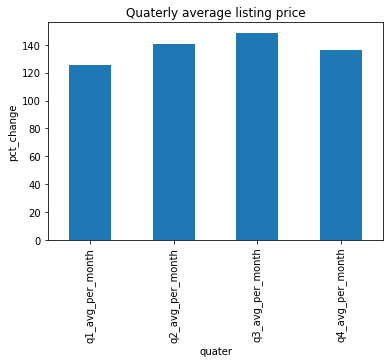

In [28]:
#plot quaterly average listing price
df_quaterly_price_means.plot(kind = 'bar', legend = None)
plt.title('Quaterly average listing price')
plt.ylabel('pct_change')

Text(0, 0.5, 'pct_change')

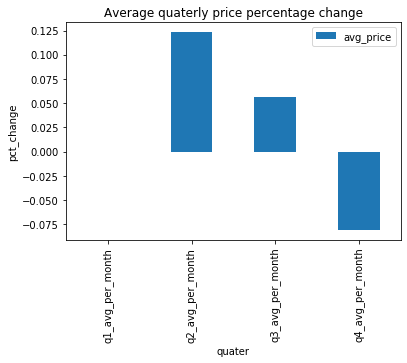

In [29]:
#plot avg quaterly price percentage change
df_quaterly_price_means.pct_change().plot(kind = 'bar')
plt.title('Average quaterly price percentage change')
plt.ylabel('pct_change')

Text(0, 0.5, 'Avg_price')

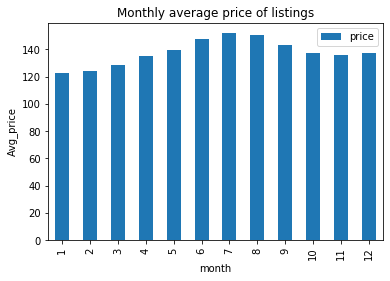

In [30]:
#Plot to show the monthly average price of listings
calender_with_price.groupby(['month'])[['price']].mean().plot(kind='bar')
plt.title('Monthly average price of listings')
plt.ylabel('Avg_price')


In [31]:
#checking the top 10 most popular pricepoints for listings

calender_with_price['price'].value_counts().head(10)

150.0    36646
100.0    31755
75.0     29820
125.0    27538
65.0     26415
90.0     24942
95.0     24327
99.0     23629
85.0     23455
80.0     19817
Name: price, dtype: int64

Text(0.5, 1.0, 'Price distribution')

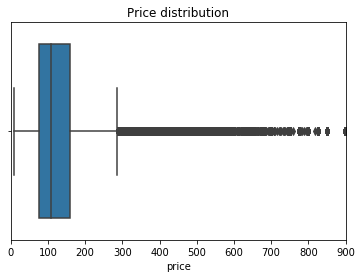

In [32]:
#Boxplot to explore the distribution of prices in the calender dataset
sns.boxplot(x=calender_with_price['price']).set(xlim=(0, 900))
plt.title('Price distribution')

In [33]:
#number of listings per month, shows list of total available listings per month in descending order of totals
calender_with_price['month'].value_counts().sort_values(ascending = False)

12    87061
3     83938
10    82438
11    81780
5     79971
9     77246
6     77244
8     76347
4     76037
7     74222
2     73321
1     64937
Name: month, dtype: int64

Text(0, 0.5, 'Number_of_Listings')

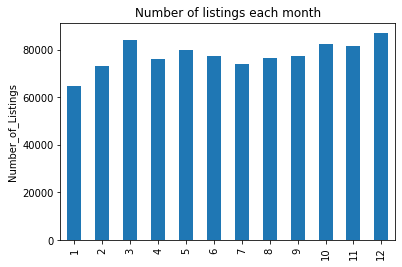

In [34]:
#plot showing number of listings per month

calender_with_price['month'].value_counts().sort_index().plot(kind = "bar")
plt.title('Number of listings each month')
plt.ylabel('Number_of_Listings')


In [35]:
#calculating the amount of monthly listings
num_monthly_listings = calender_with_price.groupby('month')['listing_id'].count()

Text(0, 0.5, 'Number_of_Listings')

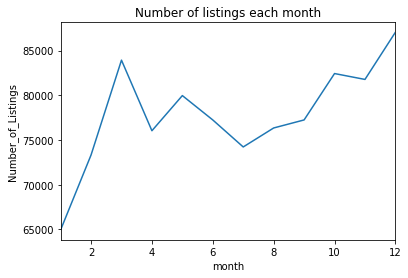

In [36]:
#plotting the amount of monthly listings
num_monthly_listings.plot(kind = "line")
plt.title('Number of listings each month')
plt.ylabel('Number_of_Listings')

In [37]:
#converting the date field in reviews to a datetime object

reviews['date'] = pd.to_datetime(reviews['date'])
reviews = reviews.set_index('date')
# Add columns with year, month, and weekday name
reviews['year'] = reviews.index.year
reviews['month'] = reviews.index.month
reviews['day'] = reviews.index.day
reviews['weekday_name'] = reviews.index.weekday_name
reviews['actual_date'] = reviews.index.date
# Display a random sampling of 5 rows
reviews.sample(5, random_state=0)

,listing_id,id,reviewer_id,reviewer_name,comments,year,month,day,weekday_name,actual_date
date,,,,,,,,,,
2014-11-17,3861673,22910899,7037587,Sarah,"Debbie was promptly communicative, welcoming, ...",2014,11,17,Monday,2014-11-17
2014-10-27,365550,21939626,17783716,Thomas,"For our first time in Seattle, Dirk and Jaq's ...",2014,10,27,Monday,2014-10-27
2013-10-22,1321090,8256811,8860136,Jenn,"The place is charming, clean, and ideally loca...",2013,10,22,Tuesday,2013-10-22
2015-06-16,4768038,35219740,10072726,Wendy,Matt's is a warm and welcoming host. His apart...,2015,6,16,Tuesday,2015-06-16
2015-08-27,533443,44618948,19706013,Matthew,Tom was very helpful in planning our night in ...,2015,8,27,Thursday,2015-08-27


In [38]:
#calculating the amount of monthly reviews
num_monthly_reviews = reviews.groupby('month')['listing_id'].count()

Text(0, 0.5, 'Number_of_Reviews')

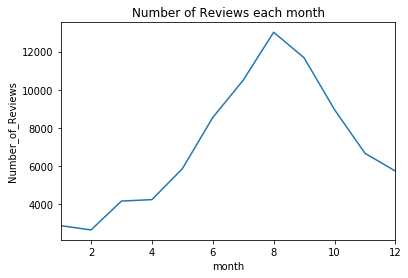

In [39]:
#plotting the amount of monthly reviews

num_monthly_reviews.plot(kind = 'line')
plt.title('Number of Reviews each month')
plt.ylabel('Number_of_Reviews')

In [40]:
#correlation between number of monthly listings and number of monthly reviews

num_monthly_listings.corr(num_monthly_reviews)

0.13081283272591424

In [41]:
#finding the average price of listings per day of the week
calender_with_price.groupby(['weekday_name'])[['price']].mean().sort_values(by='price', ascending = False)

,price
weekday_name,
Saturday,143.202136
Friday,143.036294
Thursday,136.476032
Sunday,136.459941
Monday,135.676414
Wednesday,135.447880
Tuesday,135.408764


Text(0, 0.5, 'Price')

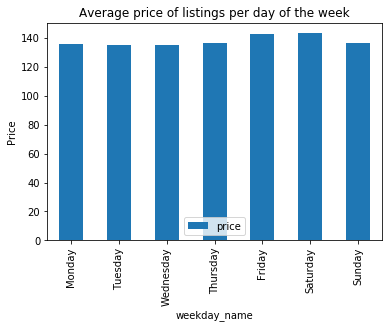

In [42]:
#plotting the average price of listings per day of the week


day_order = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#making weekday_name the index and making it categorical
calender_with_price['weekday_name'] = calender_with_price['weekday_name'].astype(CategoricalDtype(categories=day_order, ordered=True))

#plotting the average pric of listings per day of the week in weekday_name order
calender_with_price.groupby(['weekday_name'])[['price']].mean().plot(kind = "bar")
plt.title('Average price of listings per day of the week')
plt.ylabel('Price')


In [43]:
#confirming the average weekday price is consistent through the data
calender_with_price.loc['2016-10':'2016-12'].groupby(['weekday_name'])[['price']].mean().sort_values(by='price', ascending = False)

,price
weekday_name,
Saturday,141.864542
Friday,141.706743
Thursday,135.441712
Sunday,134.611139
Monday,134.285622
Wednesday,134.217426
Tuesday,134.150116


In [44]:
#finding the average price of listings per day of the month
calender_with_price.groupby(['day'])[['price']].mean().sort_values(by='price', ascending = False)[:10]

,price
day,
30,140.338536
2,138.718895
3,138.707503
23,138.697875
16,138.591508
9,138.523613
26,138.481284
29,138.256508
1,138.256320


Text(0, 0.5, 'Price')

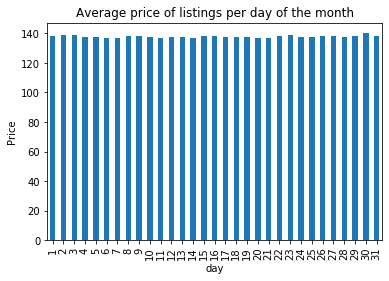

In [45]:
#plotting the average price of listings per day of the month in day order

calender_with_price.groupby(['day'])[['price']].mean().sort_index().plot(kind = 'bar').legend().remove()
plt.title('Average price of listings per day of the month')
plt.ylabel('Price')

In [46]:
#providing columns with at least 75% of data missing
most_missing_cols = set(listings.columns[listings.isnull().mean() > 0.75])
print(most_missing_cols)

{'license', 'square_feet'}


In [47]:
#providing columns with at least 25% of data missing
least_missing_cols = set(listings.columns[listings.isnull().mean() < 0.25])
print(least_missing_cols)

{'name', 'property_type', 'extra_people', 'country_code', 'host_neighbourhood', 'cancellation_policy', 'latitude', 'state', 'host_location', 'price', 'space', 'review_scores_checkin', 'has_availability', 'instant_bookable', 'country', 'host_url', 'availability_30', 'bedrooms', 'medium_url', 'requires_license', 'neighbourhood_cleansed', 'longitude', 'maximum_nights', 'first_review', 'host_verifications', 'calendar_last_scraped', 'review_scores_location', 'require_guest_phone_verification', 'description', 'host_response_time', 'neighbourhood', 'reviews_per_month', 'city', 'xl_picture_url', 'host_picture_url', 'host_listings_count', 'host_has_profile_pic', 'last_review', 'smart_location', 'host_is_superhost', 'is_location_exact', 'last_scraped', 'host_total_listings_count', 'experiences_offered', 'guests_included', 'picture_url', 'availability_90', 'require_guest_profile_picture', 'host_since', 'host_acceptance_rate', 'host_thumbnail_url', 'host_response_rate', 'bed_type', 'neighbourhood_

In [48]:
#Total capacity count of listings
accommodates_counts = listings['accommodates'].value_counts()
accommodates_counts

2     1627
4      785
3      398
6      332
1      256
5      184
8      119
7       52
10      25
12      15
9       13
16       4
11       3
14       3
15       2
Name: accommodates, dtype: int64

In [49]:
#Total capacity count of listings percentage
accommodates_counts_perc = accommodates_counts/accommodates_counts.sum()
accommodates_counts_perc

2     0.426139
4     0.205605
3     0.104243
6     0.086957
1     0.067051
5     0.048193
8     0.031168
7     0.013620
10    0.006548
12    0.003929
9     0.003405
16    0.001048
11    0.000786
14    0.000786
15    0.000524
Name: accommodates, dtype: float64

Text(0, 0.5, 'count')

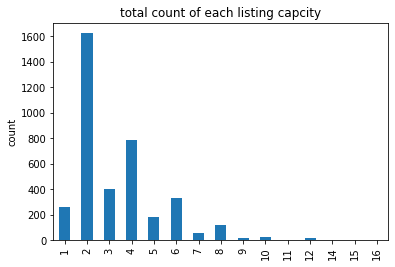

In [50]:
#Plot showing the total count of each listing capcity
listings['accommodates'].value_counts().sort_index().plot(kind = 'bar')
plt.title('total count of each listing capcity')
plt.ylabel('count')

In [51]:
#Total bedroom count for each bedroom size type

bedrooms_counts = listings['bedrooms'].value_counts()
bedrooms_counts

1.0    2417
2.0     640
0.0     372
3.0     283
4.0      69
5.0      24
6.0       6
7.0       1
Name: bedrooms, dtype: int64

In [52]:
#Total bedroom count for each bedroom size type

bedrooms_counts_perc = bedrooms_counts/bedrooms_counts.sum()
bedrooms_counts_perc

1.0    0.634050
2.0    0.167891
0.0    0.097587
3.0    0.074239
4.0    0.018101
5.0    0.006296
6.0    0.001574
7.0    0.000262
Name: bedrooms, dtype: float64

Text(0, 0.5, 'count')

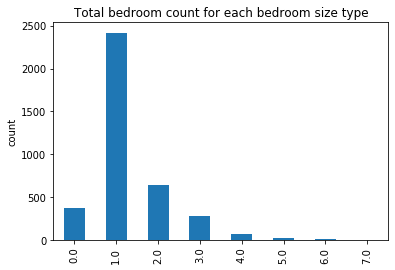

In [53]:
#Plot total bedroom count for each bedroom size type

listings['bedrooms'].value_counts().sort_index().plot(kind = 'bar')
plt.title('Total bedroom count for each bedroom size type')
plt.ylabel('count')

In [54]:
#Investigating why bedrooms = 0 
listings[listings['bedrooms'] == 0]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
39,6389657,https://www.airbnb.com/rooms/6389657,20160104002432,2016-01-04,Cute little Seattle Studio!,I love my little studio! My space might be sma...,The patio has a table and chairs and potted pl...,I love my little studio! My space might be sma...,none,"The apartment is in a great location, everythi...",...,10.0,f,NaN,WASHINGTON,f,flexible,f,f,1,1.98
45,6004058,https://www.airbnb.com/rooms/6004058,20160104002432,2016-01-04,LOWER QUEEN ANNE STUDIO W/PATIO,I love my 3rd floor vintage studio apartment w...,-kitchen (stocked with basics & condiments) -b...,I love my 3rd floor vintage studio apartment w...,none,Queen Anne is very Walk-able. From the studio ...,...,9.0,f,NaN,WASHINGTON,f,flexible,f,f,1,2.29
47,8515408,https://www.airbnb.com/rooms/8515408,20160104002432,2016-01-04,Queen Anne Hill Craftsman studio,"Beautiful craftsman style studio, located in o...","The ""Urban Nest"" studio was built with comfort...","Beautiful craftsman style studio, located in o...",none,Queen Anne Hill is centrally located. A very ...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,1.06
50,7772661,https://www.airbnb.com/rooms/7772661,20160104002432,2016-01-04,:: Carriage House :: Queen Anne ::,Charming loft-style studio in an urban garden ...,"This is a detached carriage house, all yours t...",Charming loft-style studio in an urban garden ...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,5673552,https://www.airbnb.com/rooms/5673552,20160104002432,2016-01-04,Beautiful loft in downtown Fremont,Our cool loft apartment offers a convenient lo...,This historic building houses a converted stor...,Our cool loft apartment offers a convenient lo...,none,"Fremont is a unique, young neighborhood filled...",...,10.0,f,NaN,WASHINGTON,f,flexible,f,f,1,1.18
3797,10118341,https://www.airbnb.com/rooms/10118341,20160104002432,2016-01-04,Fremont Lighthouse Mother-in-Law,A clean and simple mother-in-law across the st...,A clean and simple mother-in-law basement stud...,A clean and simple mother-in-law across the st...,none,Located at the top of Fremont neighborhood/up ...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.00
3804,7178490,https://www.airbnb.com/rooms/7178490,20160104002432,2016-01-04,Cedar House Studio Suite in Fremont,"Comfortable and clean, this lower level suite ...","A lush, private garden path leads to the entra...","Comfortable and clean, this lower level suite ...",none,Upper Fremont is a vibrant neighborhood that o...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,2.34
3807,4940491,https://www.airbnb.com/rooms/4940491,20160104002432,2016-01-04,Roof Deck in Fremont/Wallingford,Adorable private studio nestled in one of Seat...,The studio is filled with beautiful original a...,Adorable private studio nestled in one of Seat...,none,From the apartment it is an easy walk to the h...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.78


In [55]:
#Counting values for each cancellation policy

cancellation_policy_count = listings['cancellation_policy'].value_counts()
cancellation_policy_count


strict      1417
moderate    1251
flexible    1150
Name: cancellation_policy, dtype: int64

In [56]:
#Calculating percentage values for each cancellation policy

cancellation_policy_count_perc = cancellation_policy_count/cancellation_policy_count.sum()
cancellation_policy_count_perc

strict      0.371137
moderate    0.327658
flexible    0.301205
Name: cancellation_policy, dtype: float64

Text(0, 0.5, 'count')

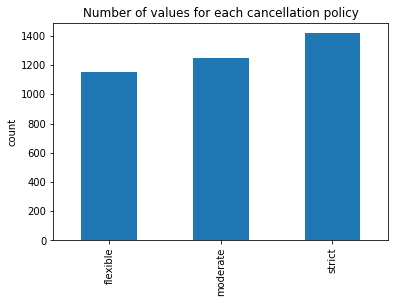

In [57]:
#Plot count values for each cancellation policy

listings['cancellation_policy'].value_counts().sort_index().plot(kind = 'bar')
plt.title('Number of values for each cancellation policy')
plt.ylabel('count')

In [58]:
#Exploring the city variable
listings['city'].value_counts()

Seattle                  3810
West Seattle                2
Seattle                     2
Phinney Ridge Seattle       1
西雅图                         1
Ballard, Seattle            1
seattle                     1
Name: city, dtype: int64

In [59]:
#Exploring the country variable
listings['country'].value_counts()

United States    3818
Name: country, dtype: int64

In [60]:
#Exploring the country_code variable
listings['country_code'].value_counts()

US    3818
Name: country_code, dtype: int64

In [61]:
#Exploring the extra_people charge variable

extra_people_charge_counts = listings['extra_people'].value_counts().head(10)
extra_people_charge_counts

$0.00     2048
$10.00     355
$25.00     322
$15.00     309
$20.00     308
$50.00     113
$30.00      85
$5.00       58
$40.00      39
$35.00      35
Name: extra_people, dtype: int64

In [62]:
#Exploring the proportion of values in the extra_people charge variable
extra_people_charge_counts_perc = extra_people_charge_counts/extra_people_charge_counts.sum()
extra_people_charge_counts_perc.sort_index().head(10)

$0.00     0.557734
$10.00    0.096678
$15.00    0.084150
$20.00    0.083878
$25.00    0.087691
$30.00    0.023148
$35.00    0.009532
$40.00    0.010621
$5.00     0.015795
$50.00    0.030773
Name: extra_people, dtype: float64

In [63]:
#Exploring the host_acceptance_rate variable
listings['host_acceptance_rate'].value_counts()

100%    3044
0%         1
Name: host_acceptance_rate, dtype: int64

In [64]:
#Exploring the host_has_profile_pic variable
listings['host_has_profile_pic'].value_counts()

t    3809
f       7
Name: host_has_profile_pic, dtype: int64

In [65]:
#Exploring the host_is_superhost variable
superhost_count = listings['host_is_superhost'].value_counts()
superhost_count

f    3038
t     778
Name: host_is_superhost, dtype: int64

In [66]:
#Exploring the host_is_superhost variable proportion

superhost_count_perc = superhost_count/superhost_count.sum()
superhost_count_perc

f    0.796122
t    0.203878
Name: host_is_superhost, dtype: float64

In [67]:
#Exploring the host_location variable

listings['host_location'].value_counts()

Seattle, Washington, United States        3259
US                                         246
Spokane, Washington, United States          41
Kent, Washington, United States             34
Los Angeles, California, United States      13
                                          ... 
Massachusetts, United States                 1
Addison, Texas, United States                1
Gosnold, Massachusetts, United States        1
Las Vegas, Nevada, United States             1
San Jose, California, United States          1
Name: host_location, Length: 120, dtype: int64

In [68]:
#Exploring the host_neighbourhood variable

host_neighbourhood_count = listings['host_neighbourhood'].value_counts()
host_neighbourhood_count

Capitol Hill     405
Belltown         254
Ballard          210
Minor            191
Queen Anne       189
                ... 
Forestland         1
Beverly Hills      1
Waianae Coast      1
East Village       1
Roxhill            1
Name: host_neighbourhood, Length: 102, dtype: int64

In [69]:
#Exploring the host_neighbourhood variable proportion
host_neighbourhood_count_perc = host_neighbourhood_count/host_neighbourhood_count.sum()
host_neighbourhood_count_perc.head(10)

Capitol Hill                 0.115122
Belltown                     0.072200
Ballard                      0.059693
Minor                        0.054292
Queen Anne                   0.053724
Fremont                      0.041785
Wallingford                  0.038090
North Beacon Hill            0.028709
Ravenna                      0.028425
Central Business District    0.026435
Name: host_neighbourhood, dtype: float64

Text(0, 0.5, 'count')

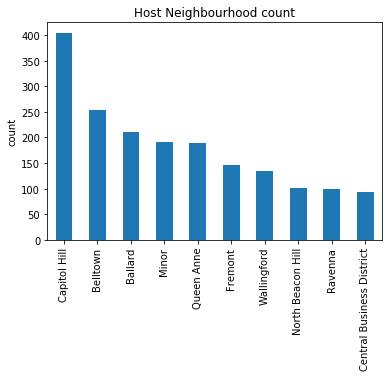

In [70]:
#Plotting the host_neighbourhood variable count for each neighbourhood
host_neighbourhood_count.head(10).plot(kind='bar')
plt.title('Host Neighbourhood count')
plt.ylabel('count')

In [71]:
#Exploring the host_response_rate variable
host_response_rate_count = listings['host_response_rate'].str.replace('%','').astype('float').value_counts().head(10)#converting the volum to float from string after replacing the comma for easieir analysis 
host_response_rate_count

100.0    2371
90.0      165
80.0      104
99.0       78
88.0       66
50.0       52
94.0       46
67.0       41
75.0       32
89.0       32
Name: host_response_rate, dtype: int64

In [72]:
#Exploring the host_response_rate variable proportion
host_response_rate_count_perc = host_response_rate_count/host_response_rate_count.sum()
host_response_rate_count_perc

100.0    0.793773
90.0     0.055239
80.0     0.034818
99.0     0.026113
88.0     0.022096
50.0     0.017409
94.0     0.015400
67.0     0.013726
75.0     0.010713
89.0     0.010713
Name: host_response_rate, dtype: float64

In [73]:
#Exploring the host_response_rate variable
host_response_time_counts = listings['host_response_time'].value_counts()
host_response_time_counts

within an hour        1692
within a few hours     968
within a day           597
a few days or more      38
Name: host_response_time, dtype: int64

In [74]:
#Exploring the host_response_rate variable proportion
host_response_time_counts_perc = host_response_time_counts/host_response_time_counts.sum()
host_response_time_counts_perc

within an hour        0.513505
within a few hours    0.293778
within a day          0.181184
a few days or more    0.011533
Name: host_response_time, dtype: float64

Text(0, 0.5, 'count')

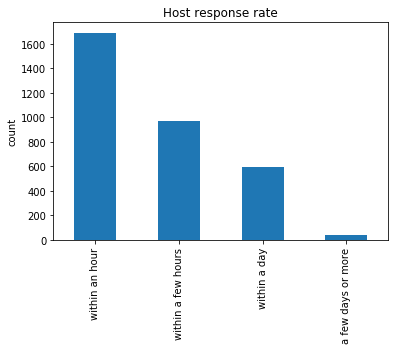

In [75]:
#Plotting the host_response_time variable count
host_response_time_counts.plot(kind = 'bar')
plt.title('Host response rate')
plt.ylabel('count')

In [76]:
#Exploring the neighbourhood variable

top_ten_neighbourhood_counts = listings['neighbourhood'].value_counts()[:10]
top_ten_neighbourhood_counts

Capitol Hill           351
Ballard                213
Belltown               204
Minor                  192
Queen Anne             187
Fremont                148
Wallingford            143
University District    107
First Hill             105
Stevens                 98
Name: neighbourhood, dtype: int64

Text(0, 0.5, 'count')

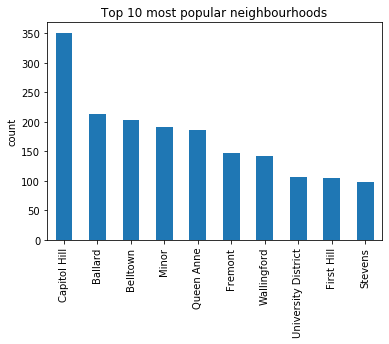

In [77]:
#Plotting the top 10 most popular neighbourhood variable
top_ten_neighbourhood_counts.plot(kind = 'bar')
plt.title('Top 10 most popular neighbourhoods')
plt.ylabel('count')

In [78]:
#Exploring the neighbourhood_cleansed variable

top_ten_neighbourhood_cleansed_counts = listings['neighbourhood_cleansed'].value_counts()[:10]
top_ten_neighbourhood_cleansed_counts

Broadway                     397
Belltown                     234
Wallingford                  167
Fremont                      158
Minor                        135
University District          122
Stevens                      119
First Hill                   108
Central Business District    103
Lower Queen Anne              94
Name: neighbourhood_cleansed, dtype: int64

Text(0, 0.5, 'count')

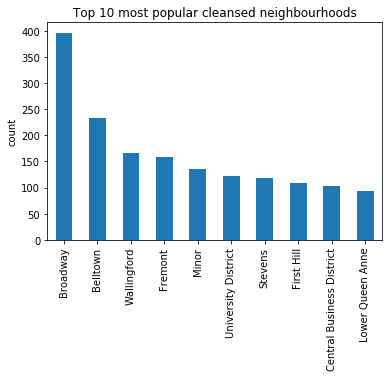

In [79]:
#Plotting the top 10 most popular neighbourhood_cleansed variable
top_ten_neighbourhood_cleansed_counts.plot(kind= 'bar')
plt.title('Top 10 most popular cleansed neighbourhoods')
plt.ylabel('count')

In [80]:
#Exploring the neighbourhood_group_cleansed variable
listings['neighbourhood_group_cleansed'].value_counts()[:10]

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Name: neighbourhood_group_cleansed, dtype: int64

In [81]:
#Counting the popular price points in the data
count_popular_pricepoints = listings['price'].str.replace('$', "").str.replace(',','').astype('float').value_counts(ascending = False)
count_popular_pricepoints.head(20)

150.0    162
100.0    159
75.0     118
95.0     110
99.0     110
90.0     107
125.0    105
85.0     104
65.0     104
80.0      96
110.0     86
70.0      80
55.0      76
200.0     74
120.0     74
175.0     73
60.0      72
50.0      70
250.0     64
115.0     64
Name: price, dtype: int64

Text(0.5, 0, 'pricepoints')

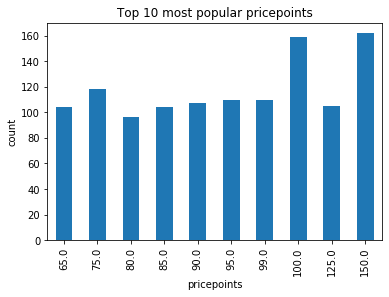

In [82]:
#Plotting the top 10 most popular neighbourhood_cleansed variable
count_popular_pricepoints.head(10).sort_index(ascending=True).plot(kind = 'bar')
plt.title('Top 10 most popular pricepoints')
plt.ylabel('count')
plt.xlabel('pricepoints')

In [83]:
#Converting the price variable in listings dataset to float for analysis

listings['price'].str.replace('$', "").str.replace(',','').astype('float').describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

Text(0.5, 0, 'price')

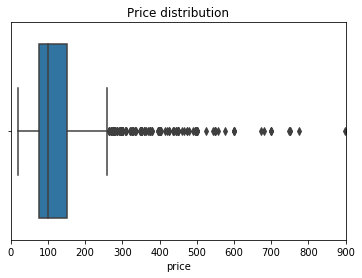

In [84]:
#Creating boxplot of the price variable

sns.boxplot(x=listings['price'].str.replace('$', "").str.replace(',','').astype('float')).set(xlim=(0, 900))
plt.title('Price distribution')
plt.xlabel('price')

In [85]:
#Exploring the property_type variable in listings dataset

property_type_counts = listings['property_type'].value_counts()
property_type_counts

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

Text(0, 0.5, 'count')

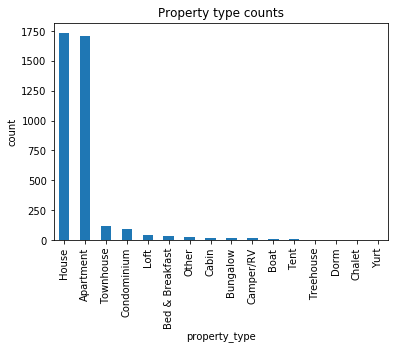

In [86]:
#Creating bar plot of the property type counts

property_type_counts.plot(kind='bar')
plt.title('Property type counts')
plt.xlabel('property_type')
plt.ylabel('count')

In [87]:
#Exploring distribution of property types in the listing dataset
property_type_counts_perc = property_type_counts/property_type_counts.sum()
property_type_counts_perc

House              0.454021
Apartment          0.447472
Townhouse          0.030914
Condominium        0.023841
Loft               0.010479
Bed & Breakfast    0.009693
Other              0.005764
Cabin              0.005502
Bungalow           0.003406
Camper/RV          0.003406
Boat               0.002096
Tent               0.001310
Treehouse          0.000786
Dorm               0.000524
Chalet             0.000524
Yurt               0.000262
Name: property_type, dtype: float64

In [88]:
#Exploring the review_scores_checkin in the listing dataset
review_scores_checkin_counts = listings['review_scores_checkin'].value_counts()
review_scores_checkin_counts

10.0    2644
9.0      423
8.0       64
7.0       12
6.0        9
4.0        5
2.0        2
5.0        1
Name: review_scores_checkin, dtype: int64

Text(0, 0.5, 'count')

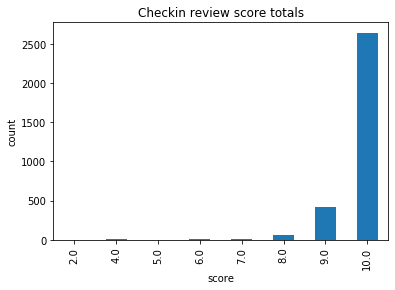

In [89]:
#Creating bar plot of the review_scores_checkin_counts

review_scores_checkin_counts.sort_index(ascending = True).plot(kind='bar')
plt.title('Checkin review score totals')
plt.xlabel('score')
plt.ylabel('count')

In [90]:
#Exploring distribution of review_scores_checkin in the listing dataset
review_scores_checkin_counts_perc = review_scores_checkin_counts/review_scores_checkin_counts.sum()
review_scores_checkin_counts_perc

10.0    0.836709
9.0     0.133861
8.0     0.020253
7.0     0.003797
6.0     0.002848
4.0     0.001582
2.0     0.000633
5.0     0.000316
Name: review_scores_checkin, dtype: float64

In [91]:
#Exploring the review_scores_cleanliness in the listing dataset
review_scores_cleanliness_counts = listings['review_scores_cleanliness'].value_counts()
review_scores_cleanliness_counts

10.0    2161
9.0      740
8.0      184
7.0       40
6.0       30
5.0        5
4.0        4
3.0        1
Name: review_scores_cleanliness, dtype: int64

In [92]:
#Exploring distribution of review_scores_checkin in the listing dataset
review_scores_cleanliness_counts_perc = review_scores_cleanliness_counts/review_scores_cleanliness_counts.sum()
review_scores_cleanliness_counts_perc

10.0    0.682780
9.0     0.233807
8.0     0.058136
7.0     0.012638
6.0     0.009479
5.0     0.001580
4.0     0.001264
3.0     0.000316
Name: review_scores_cleanliness, dtype: float64

Text(0, 0.5, 'count')

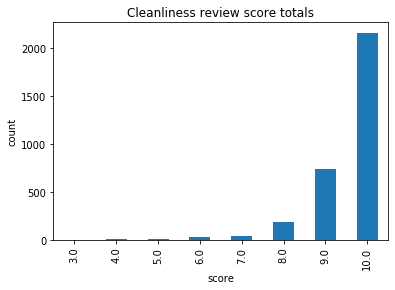

In [93]:
#Creating bar plot of the review_scores_cleanliness_counts

review_scores_cleanliness_counts.sort_index(ascending = True).plot(kind='bar')
plt.title('Cleanliness review score totals')
plt.xlabel('score')
plt.ylabel('count')

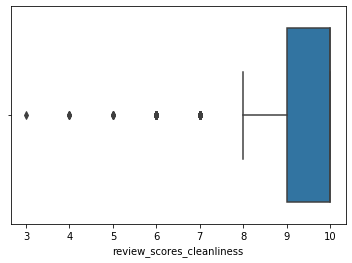

In [94]:
#Creating box plot of the review_scores_cleanliness_counts
sns.boxplot(x=listings['review_scores_cleanliness'])

In [95]:
#Exploring the review_scores_communication counts in the listing dataset
review_scores_communication_counts = listings['review_scores_communication'].value_counts()
review_scores_communication_counts

10.0    2700
9.0      388
8.0       56
7.0        8
6.0        8
2.0        3
4.0        3
5.0        1
Name: review_scores_communication, dtype: int64

In [96]:
#Exploring distribution of review_scores_communication_counts in the listing dataset
review_scores_communication_counts_perc = review_scores_communication_counts/review_scores_communication_counts.sum()
review_scores_communication_counts_perc

10.0    0.852542
9.0     0.122513
8.0     0.017682
7.0     0.002526
6.0     0.002526
2.0     0.000947
4.0     0.000947
5.0     0.000316
Name: review_scores_communication, dtype: float64

Text(0, 0.5, 'count')

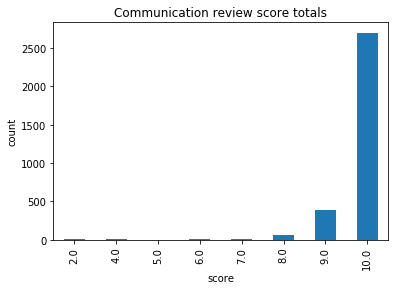

In [97]:
#Creating bar plot of the review_scores_communication_counts
review_scores_communication_counts.sort_index(ascending = True).plot(kind='bar')
plt.title('Communication review score totals')
plt.xlabel('score')
plt.ylabel('count')

In [98]:
#Exploring the review_scores_location_counts in the listing dataset
review_scores_location_counts = listings['review_scores_location'].value_counts()
review_scores_location_counts

10.0    2122
9.0      884
8.0      129
7.0       19
6.0        8
4.0        1
Name: review_scores_location, dtype: int64

Text(0, 0.5, 'count')

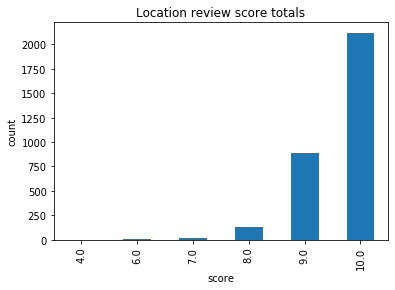

In [99]:
#Creating bar plot of the review_scores_location_counts
review_scores_location_counts.sort_index(ascending = True).plot(kind='bar')
plt.title('Location review score totals')
plt.xlabel('score')
plt.ylabel('count')

In [100]:
#Exploring the top 10 review_scores_rating in the listing dataset
review_scores_rating_counts = listings['review_scores_rating'].value_counts().head(10)
review_scores_rating_counts

100.0    781
98.0     292
96.0     278
97.0     266
95.0     260
94.0     198
93.0     184
99.0     146
90.0     138
80.0     111
Name: review_scores_rating, dtype: int64

Text(0, 0.5, 'count')

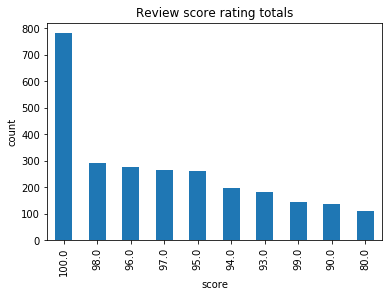

In [101]:
#Creating bar plot of the review_scores_rating_counts
review_scores_rating_counts.plot(kind='bar')
plt.title('Review score rating totals')
plt.xlabel('score')
plt.ylabel('count')

Text(0.5, 0, 'score')

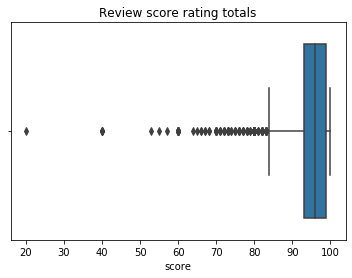

In [102]:
#Creating box plot of the review_scores_rating_counts
sns.boxplot(x=listings['review_scores_rating'])
plt.title('Review score rating totals')
plt.xlabel('score')

In [103]:
#Exploring the review_scores_value in the listing dataset
review_scores_value_counts = listings['review_scores_value'].value_counts()
review_scores_value_counts

10.0    1775
9.0     1137
8.0      190
7.0       38
6.0       16
4.0        4
5.0        1
2.0        1
Name: review_scores_value, dtype: int64

In [104]:
#Exploring distribution of review_scores_value_counts in the listing dataset
review_scores_value_counts_perc = review_scores_value_counts/review_scores_value_counts.sum()
review_scores_value_counts_perc

10.0    0.561354
9.0     0.359583
8.0     0.060089
7.0     0.012018
6.0     0.005060
4.0     0.001265
5.0     0.000316
2.0     0.000316
Name: review_scores_value, dtype: float64

In [105]:
#Exploring the reviews_per_month in the listing dataset
review_per_month_counts = listings['reviews_per_month'].value_counts()
review_per_month_counts

1.00    70
2.00    45
0.23    24
0.81    21
0.16    21
        ..
8.18     1
4.72     1
7.53     1
3.71     1
6.14     1
Name: reviews_per_month, Length: 654, dtype: int64

In [106]:
#Exploring distribution of review_scores_value_counts in the listing dataset
review_per_month_counts_perc = review_per_month_counts/review_per_month_counts.sum()
review_per_month_counts_perc

1.00    0.021937
2.00    0.014102
0.23    0.007521
0.81    0.006581
0.16    0.006581
          ...   
8.18    0.000313
4.72    0.000313
7.53    0.000313
3.71    0.000313
6.14    0.000313
Name: reviews_per_month, Length: 654, dtype: float64

Text(0.5, 1.0, 'Distribution of reviews_per_month')

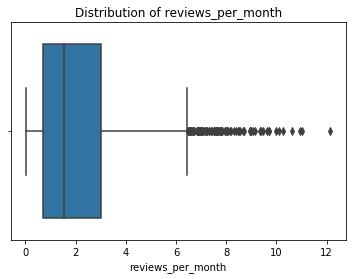

In [107]:
#Creating box plot of the review_scores_rating_counts

sns.boxplot(x=listings['reviews_per_month'])
plt.title('Distribution of reviews_per_month')

In [108]:
#Exploring the reviews_per_month variable in the listings dataset

listings['reviews_per_month'].describe()

count    3191.000000
mean        2.078919
std         1.822348
min         0.020000
25%         0.695000
50%         1.540000
75%         3.000000
max        12.150000
Name: reviews_per_month, dtype: float64

In [109]:
#Exploring the room_type variable in the listings dataset
listings['room_type'].value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

In [110]:
#Exploring the zipcode variable in the listings dataset
listings['zipcode'].value_counts().head(10)

98122    420
98103    394
98102    339
98105    225
98109    202
98101    201
98144    200
98121    196
98107    180
98115    178
Name: zipcode, dtype: int64

In [111]:
#Converting the price column in the listings dataset to float and replacing the string values in them
listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [112]:
#Grouping the listings dataset by neighbourhood_cleansed and sorting the  data by the mean of the of price in top 10 descending order
listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by = 'price', ascending = False).head(10)

,price
neighbourhood_cleansed,
Southeast Magnolia,231.705882
Portage Bay,227.857143
Westlake,194.470588
West Queen Anne,187.769231
Montlake,182.789474
Briarcliff,176.571429
Sunset Hill,176.055556
Industrial District,173.333333
Alki,171.619048


Text(0, 0.5, 'average price')

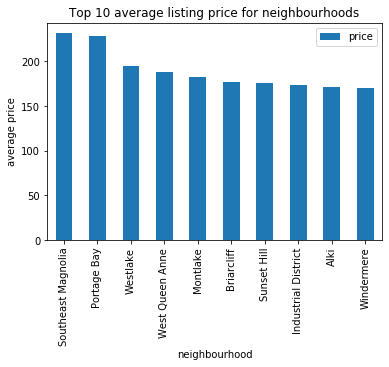

In [113]:
#Plotting the top 10 neighbourhood_cleansed with average price for the year in descending order

listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by = 'price', ascending = False).head(10).plot(kind = 'bar')
plt.title('Top 10 average listing price for neighbourhoods')
plt.xlabel('neighbourhood')
plt.ylabel('average price')


In [114]:
#Grouping the listings dataset by neighbourhood_cleansed and sorting the  data by the mean of the of price in bottom 10 descending order

listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by = 'price', ascending = False).tail(10)


,price
neighbourhood_cleansed,
Bitter Lake,83.000000
Victory Heights,81.466667
Riverview,80.500000
Maple Leaf,80.261905
Mid-Beacon Hill,79.933333
North Delridge,76.375000
Georgetown,76.125000
South Delridge,74.666667
Olympic Hills,71.687500


Text(0, 0.5, 'average price')

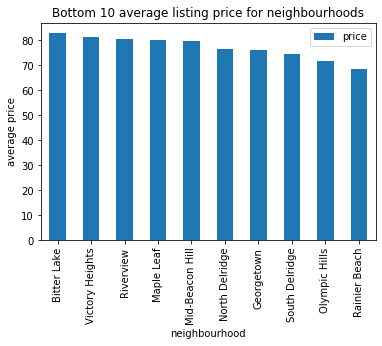

In [115]:
#Plotting the bottom 10 neighbourhood_cleansed with average price for the year in descending order

listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by = 'price', ascending = False).tail(10).plot(kind = 'bar')
plt.title('Bottom 10 average listing price for neighbourhoods')
plt.xlabel('neighbourhood')
plt.ylabel('average price')

In [116]:
#Grouping the listings dataset by neighbourhood_cleansed and sorting the  data by the mean of the of review_scores_value in top 10 descending order

listings.groupby(['neighbourhood_cleansed'])[['review_scores_value']].mean().sort_values(by = 'review_scores_value', ascending = False).head(10)


,review_scores_value
neighbourhood_cleansed,
Fauntleroy,10.000000
Genesee,9.833333
Gatewood,9.812500
Maple Leaf,9.805556
Rainier Beach,9.800000
Madrona,9.794872
North College Park,9.785714
Laurelhurst,9.777778
Highland Park,9.777778


In [117]:
#Grouping the listings dataset by neighbourhood_cleansed and sorting the  data by the mean of the of review_scores_value in bottom 10 descending order

listings.groupby(['neighbourhood_cleansed'])[['review_scores_value']].mean().sort_values(by = 'review_scores_value', ascending = False).tail(10)


,review_scores_value
neighbourhood_cleansed,
Pike-Market,9.217391
Belltown,9.197044
Ravenna,9.188679
View Ridge,9.166667
Briarcliff,9.166667
South Lake Union,9.052632
South Park,9.000000
Pinehurst,9.000000
South Beacon Hill,9.000000


In [118]:
#Grouping the listings dataset by neighbourhood_cleansed and sorting the  data by the mean of the of review_scores_location in top 10 descending order

listings.groupby(['neighbourhood_cleansed'])[['review_scores_location']].mean().sort_values(by = 'review_scores_location', ascending = False).head(10)


,review_scores_location
neighbourhood_cleansed,
Pike-Market,9.913043
Alki,9.892857
Fauntleroy,9.888889
Laurelhurst,9.888889
Adams,9.877193
Lower Queen Anne,9.876712
Sunset Hill,9.866667
Genesee,9.866667
Green Lake,9.863636


In [119]:
#Grouping the listings dataset by neighbourhood_cleansed and sorting the  data by the mean of the of review_scores_location in bottom 10 descending order

listings.groupby(['neighbourhood_cleansed'])[['review_scores_location']].mean().sort_values(by = 'review_scores_location', ascending = False).tail(10)


,review_scores_location
neighbourhood_cleansed,
Olympic Hills,8.928571
Cedar Park,8.833333
Industrial District,8.750000
Dunlap,8.666667
Arbor Heights,8.666667
Pinehurst,8.500000
Holly Park,8.500000
Highland Park,8.444444
South Park,8.000000


In [120]:
#Grouping the listings dataset by neighbourhood_cleansed and sorting the  data by the mean of the of review_scores_cleanliness in top 10 descending order

listings.groupby(['neighbourhood_cleansed'])[['review_scores_cleanliness']].mean().sort_values(by = 'review_scores_cleanliness', ascending = False).head(10)


,review_scores_cleanliness
neighbourhood_cleansed,
Pinehurst,10.000000
Riverview,10.000000
Laurelhurst,10.000000
Whittier Heights,9.916667
High Point,9.909091
Fauntleroy,9.888889
Meadowbrook,9.857143
Phinney Ridge,9.844828
Genesee,9.833333


In [121]:
#Grouping the listings dataset by neighbourhood_cleansed and sorting the  data by the mean of the of review_scores_cleanliness in bottom 10 descending order

listings.groupby(['neighbourhood_cleansed'])[['review_scores_cleanliness']].mean().sort_values(by = 'review_scores_cleanliness', ascending = False).tail(10)


,review_scores_cleanliness
neighbourhood_cleansed,
Georgetown,9.250000
Holly Park,9.250000
Westlake,9.200000
Cedar Park,9.166667
South Lake Union,9.105263
Bitter Lake,9.083333
University District,9.063158
View Ridge,9.000000
South Park,9.000000


In [122]:
#Grouping the listings dataset by neighbourhood_cleansed and sorting the  data by the mean of the of review_scores_rating in top 10 descending order

listings.groupby(['neighbourhood_cleansed'])[['review_scores_rating']].mean().sort_values(by = 'review_scores_rating', ascending = False).head(10)


,review_scores_rating
neighbourhood_cleansed,
Arbor Heights,98.000000
Riverview,97.250000
Southeast Magnolia,97.214286
Madrona,97.100000
Harrison/Denny-Blaine,97.083333
Genesee,96.933333
North Beach/Blue Ridge,96.909091
Laurelhurst,96.777778
Whittier Heights,96.666667


In [123]:
#Grouping the listings dataset by neighbourhood_cleansed and sorting the  data by the mean of the of review_scores_rating in bottom 10 descending order

listings.groupby(['neighbourhood_cleansed'])[['review_scores_rating']].mean().sort_values(by = 'review_scores_rating', ascending = False).tail(10)


,review_scores_rating
neighbourhood_cleansed,
Eastlake,92.222222
Lawton Park,92.095238
Holly Park,92.000000
Ravenna,91.240741
South Lake Union,90.789474
View Ridge,90.166667
South Beacon Hill,89.500000
Pinehurst,89.250000
University District,88.437500


In [124]:
#Grouping the listings dataset by host_is_superhost and sorting the  data by the mean of the of reviews_per_month

listings.groupby(['host_is_superhost'])[['reviews_per_month']].mean().sort_values(by = 'reviews_per_month', ascending = False)


,reviews_per_month
host_is_superhost,
t,2.969627
f,1.804770


In [125]:
#Grouping the listings dataset by host_is_superhost and sorting the  data by the mean of the of review_scores_value
listings.groupby(['host_is_superhost'])[['review_scores_value']].mean().sort_values(by = 'review_scores_value', ascending = False).tail(10)


,review_scores_value
host_is_superhost,
t,9.749667
f,9.359602


In [126]:
#Grouping the listings dataset by host_is_superhost and sorting the  data by the mean of the of review_scores_rating

listings.groupby(['host_is_superhost'])[['review_scores_rating']].mean().sort_values(by = 'review_scores_rating', ascending = False).tail(10)


,review_scores_rating
host_is_superhost,
t,97.395473
f,93.652893


In [127]:
#Grouping the listings dataset by host_is_superhost and sorting the  data by the mean of the of review_scores_location

listings.groupby(['host_is_superhost'])[['review_scores_location']].mean().sort_values(by = 'review_scores_location', ascending = False).tail(10)


,review_scores_location
host_is_superhost,
t,9.750999
f,9.564677


In [128]:
#Grouping the listings dataset by host_is_superhost and sorting the  data by the mean of the of review_scores_communication

listings.groupby(['host_is_superhost'])[['review_scores_communication']].mean().sort_values(by = 'review_scores_communication', ascending = False).tail(10)


,review_scores_communication
host_is_superhost,
t,9.974700
f,9.758278


In [129]:
#Grouping the listings dataset by host_is_superhost and sorting the  data by the mean of the of review_scores_cleanliness

listings.groupby(['host_is_superhost'])[['review_scores_cleanliness']].mean().sort_values(by = 'review_scores_cleanliness', ascending = False).tail(10)


,review_scores_cleanliness
host_is_superhost,
t,9.885486
f,9.454018


In [130]:
#Grouping the listings dataset by host_is_superhost and sorting the  data by the mean of the of review_scores_checkin

listings.groupby(['host_is_superhost'])[['review_scores_checkin']].mean().sort_values(by = 'review_scores_checkin', ascending = False).tail(10)


,review_scores_checkin
host_is_superhost,
t,9.964048
f,9.731424


In [131]:
#Grouping the listings dataset by host_is_superhost and sorting the  data by the mean of the of review_scores_accuracy

listings.groupby(['host_is_superhost'])[['review_scores_accuracy']].mean().sort_values(by = 'review_scores_accuracy', ascending = False).tail(10)


,review_scores_accuracy
host_is_superhost,
t,9.905459
f,9.552511


In [132]:
#Grouping the listings dataset by host_is_superhost and sorting the  data by the mean of the of review_scores_communication

listings.groupby(['host_response_time'])[['review_scores_communication']].mean().sort_values(by = 'review_scores_communication', ascending = False).tail(10)


,review_scores_communication
host_response_time,
within an hour,9.850099
within a day,9.773305
within a few hours,9.760766
a few days or more,9.206897


In [133]:
#Making the review_scores_rating field the same scale as the rest of the review columns
listings['review_scores_rating'] = listings['review_scores_rating']/10

In [134]:
#Creating parameter for xticks plots
N = 6
#creating a new variable to store the average counts of review scores/ratings for superhosts and non superhosts
superhost_review_avgs = listings.groupby(['host_is_superhost'])[['review_scores_accuracy', 'review_scores_communication', 'review_scores_checkin', 'review_scores_value', 'review_scores_rating', 'review_scores_location']].mean()
#Creating parameter for xticks plots
ind = np.arange(N)
width = 0.35 

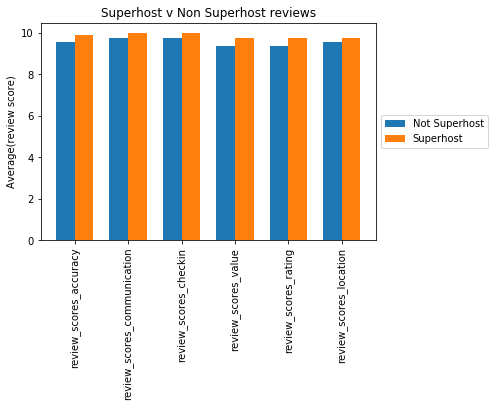

In [135]:
#Creating bar plot to comapre the average counts of review scores/ratings for superhosts and non superhosts

plt.bar(ind, superhost_review_avgs.loc['f'], width, label= 'Not Superhost')
plt.bar(ind + width, superhost_review_avgs.loc['t'], width, label= 'Superhost')
plt.ylabel('Average(review score)')
plt.title('Superhost v Non Superhost reviews')

plt.xticks(ind + width / 2, ('review_scores_accuracy', 'review_scores_communication', 'review_scores_checkin', 'review_scores_value', 'review_scores_rating', 'review_scores_location'),  rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [136]:
#checking superhost average percentage review score perfomance compared to non superhosts
print('Superhost on average score',(((superhost_review_avgs.loc['t'] - superhost_review_avgs.loc['f'])/superhost_review_avgs.loc['t'])*100).mean(),'% higher review scores/ratings')


Superhost on average score 2.970296957491995 % higher review scores/ratings


In [137]:
# cleaning the text in the comments sectioin of the review dataset and return the wordnet object value corresponding to the POS tag


def get_wordnet_pos(pos_tag):
    '''
    Function to tag nouns, adjectives, verbs and adverbs in data comments
    INPUT:
    post_tag - tag the text as a noun, verb, adverb or adjective
    OUTPUT:
    a text tagged as a noun, verb, adverb or adjective
    
    '''
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

reviews['comments'] = reviews['comments'].astype(str)

def clean_text(text):
    '''
    Function to clean text in comments field
    INPUT:
    text - dataframe column with text field
    OUTPUT:
    cleaned comments in accordance with the comments below
    
    '''
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews["comments_clean"] = reviews["comments"].apply(lambda x: clean_text(x))

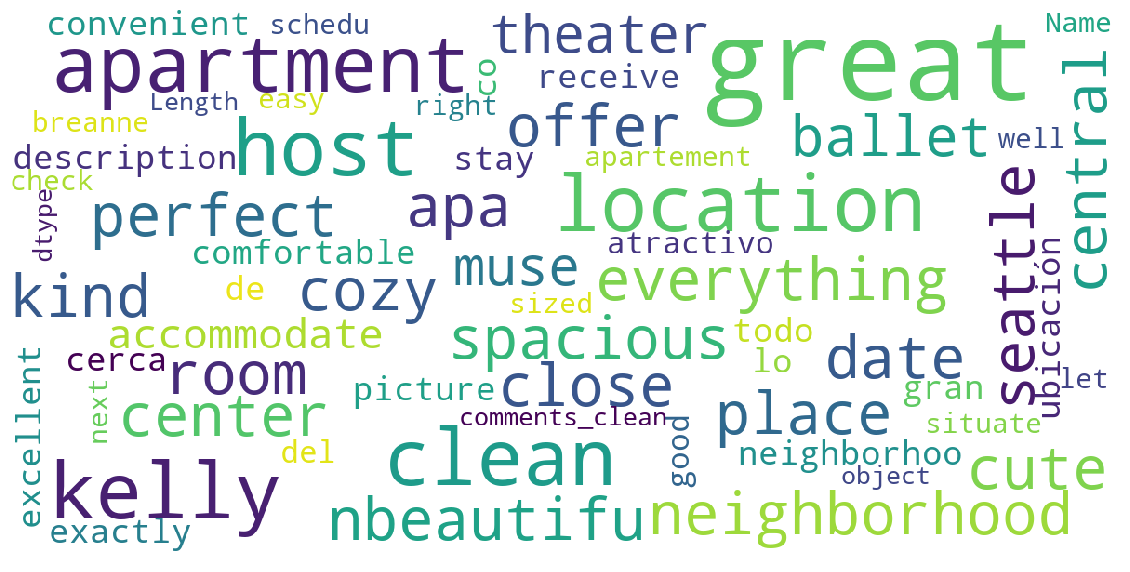

In [138]:
#imporing library to create wordcloud for review dataset comments analysis

def show_wordcloud(data, title = None):
    '''
    Function to show wordcloud in terminal
    INPUT:
    data - data set(df[column])
    OUTPUT:
    wordcloud visualising data
    
    Helps to map each listing_id to it's respective neighbourhood in order to associate reviews with neighbourhoods
    '''
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

    
# print wordcloud
show_wordcloud(reviews["comments_clean"])


#standout, great, clean, accomodating,
#standout spacious, perfect, central, location, excellent, neigbhourhood, cozy, center, cute, theater, 
#foreign, del, ubacacion, de, apartement
#who is kelly
#host is important
#why ballet


In [139]:
#Get the neighbourhood name from neighbourhood_cleansed field in listings dataset and joining it to the reviews dataset
def get_neighborhood(listing_id):
    '''
    Function to take a listing id and pass back the neighbourhood_cleansed field from the listings data set
    INPUT:
    listing_id - listing_id field for a particular listing
    OUTPUT:
    neighbourhood - the neighbourhood_cleansed field associated with a particular listing_id
    
    Helps to map each listing_id to it's respective neighbourhood in order to associate reviews with neighbourhoods
    '''
    neighbourhood_cleansed = listings.loc[listings['id'] == listing_id, 'neighbourhood_cleansed'].iloc[0]
    return neighbourhood_cleansed

# Test function
get_neighborhood(1018204)

'Minor'

In [140]:
# Apply get_neighborhood function to the listing ids
reviews['neighbourhood_cleansed'] = reviews['listing_id'].apply(get_neighborhood)


In [141]:
#Generating frequency distribution dictionary-like object
dist = nltk.FreqDist(reviews['comments_clean'])

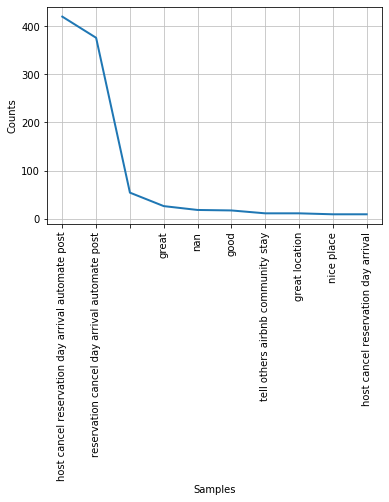

In [142]:
#20 most common reviews in comments
dist.plot(10)

In [143]:
#Generating frequency distribution dictionary-like object
dist_Minor = nltk.FreqDist(reviews[reviews['neighbourhood_cleansed'] == 'Minor']['comments_clean'])

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


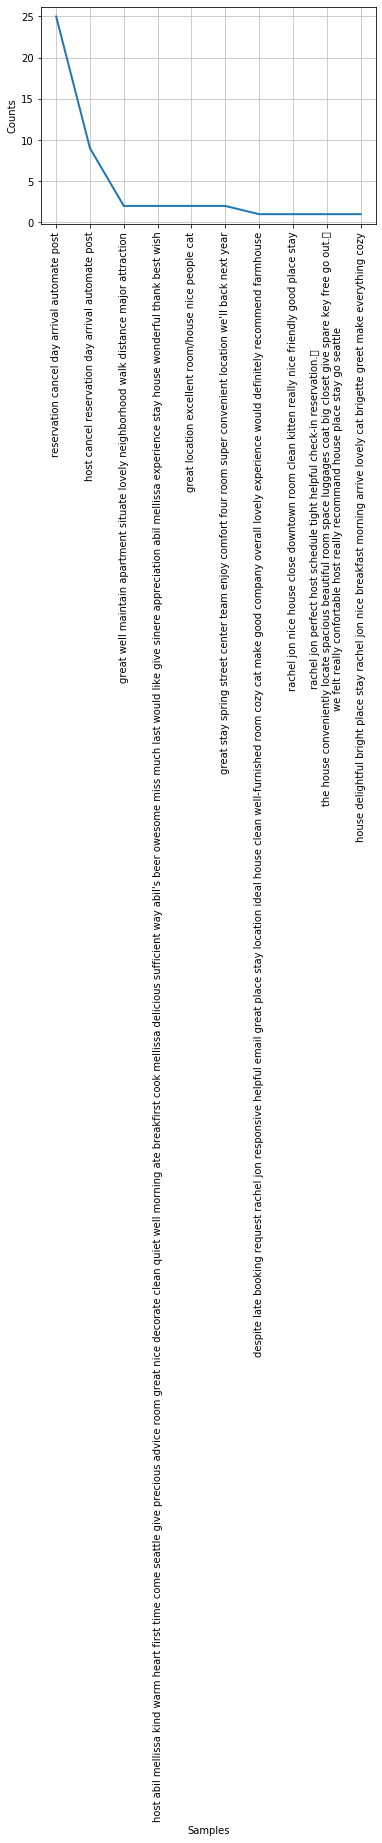

In [144]:
#20 most common reviews in comments
dist_Minor.plot(10)

In [145]:
#tokenizing comments for analysis
nltk.download('punkt')
comments = str(reviews['comments_clean'])
tokenized_comments =word_tokenize(comments)


[nltk_data] Downloading package punkt to /Users/deogakofi-
[nltk_data]     ofuafor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [146]:
#Generating frequency distribution dictionary-like object
dist_token = nltk.FreqDist(tokenized_comments)

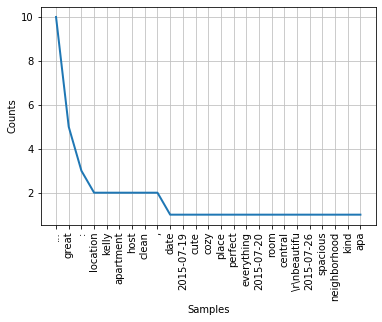

In [147]:
#25 most common reviews in comments
dist_token.plot(25)

In [148]:
#creating analyser for polarity score

analyser = SentimentIntensityAnalyzer()

In [149]:
#Function to return the compound scores of the sentiment analyser on comments variable in reviews
def sentiment_analyzer_scores(sentence):
    '''
    Function analyse sentiments of comments
    INPUT:
    sentence - a column of comments
    OUTPUT:
    compound polarity score of the comments
    '''
    sentence = str(sentence)
    score = analyser.polarity_scores(sentence)
    return score['compound']

In [150]:
#Applying the sentiment analyser to the cleaned comments and storing it in a new polarity score column
reviews['polarity_score'] = reviews['comments_clean'].apply(sentiment_analyzer_scores)
reviews.sort_values(by='polarity_score', ascending = False).head()


,listing_id,id,reviewer_id,reviewer_name,comments,year,month,day,weekday_name,actual_date,comments_clean,neighbourhood_cleansed,polarity_score
date,,,,,,,,,,,,,
2014-12-11,4429898,23827888,13997957,Aindrea,Awesome location about a mile from downtown Ba...,2014,12,11,Thursday,2014-12-11,awesome location mile downtown ballard ton cut...,Whittier Heights,0.9995
2013-08-13,803902,6458568,6664250,Canny,"Dear Sue, Thank you for being such a wonderful...",2013,8,13,Tuesday,2013-08-13,dear sue thank wonderful host honest warm resp...,Alki,0.9992
2014-07-13,3265292,15639164,16786971,Cheri,So grateful for the wonderful week we stayed a...,2014,7,13,Sunday,2014-07-13,grateful wonderful week stay joanne's beautifu...,Alki,0.9991
2015-10-03,2033191,49404457,45376296,Judith,Our stay at Paul's Green Lake house couldn't h...,2015,10,3,Saturday,2015-10-03,stay paul's green lake house well arrive dark ...,Green Lake,0.9991
2015-08-05,1048798,41201991,31934586,Sandy,This was our third trip to Seattle to visit ou...,2015,8,5,Wednesday,2015-08-05,third trip seattle visit son first experience ...,Fauntleroy,0.9990


In [151]:
reviews['polarity_score'].mean()

0.8862596978161121

In [152]:
#Exploring the most negative compound polarity scores
reviews.sort_values(by='polarity_score', ascending = True).head(15)

,listing_id,id,reviewer_id,reviewer_name,comments,year,month,day,weekday_name,actual_date,comments_clean,neighbourhood_cleansed,polarity_score
date,,,,,,,,,,,,,
2015-07-11,258571,37845285,31512581,Ysett,Wir sind 5 Nächte geblieben. Und es ist eine A...,2015,7,11,Saturday,2015-07-11,wir sind nächte geblieben und es ist eine apar...,Broadway,-0.9973
2013-06-13,1018204,5122651,6775393,Heidi,"leider war esnicht so fein, da die unterkunft ...",2013,6,13,Thursday,2013-06-13,leider war esnicht fein da die unterkunft alle...,Minor,-0.9964
2015-08-29,4577542,44747593,25805389,Sebastian,"Die Unterkunft war sehr schön und genau so, wi...",2015,8,29,Saturday,2015-08-29,die unterkunft war sehr schön und genau wie au...,Minor,-0.9958
2011-10-30,26116,676184,1285702,Erwin,Für den Aufenthalt in einer fremdem Stadt hatt...,2011,10,30,Sunday,2011-10-30,für den aufenthalt einer fremdem stadt hatte i...,Broadway,-0.9927
2015-09-22,6245498,47987633,37813877,Thomas,Der Bungalow von Kevin bietet alle Annehmlichk...,2015,9,22,Tuesday,2015-09-22,der bungalow von kevin bietet alle annehmlichk...,Whittier Heights,-0.9902
2013-12-30,208356,9460490,8861013,Janine,Die Unterkunft ist so wie beschrieben und die ...,2013,12,30,Monday,2013-12-30,die unterkunft ist wie beschrieben und die hos...,International District,-0.9892
2015-10-08,5805162,50003127,35012917,Fritz,Die Ankunft war unkompliziert. Die Lage ist ru...,2015,10,8,Thursday,2015-10-08,die ankunft war unkompliziert die lage ist ruh...,Ravenna,-0.9881
2014-09-04,685600,18998817,19849239,Anne,Das Zimmer war wie beschrieben und die Umgebun...,2014,9,4,Thursday,2014-09-04,das zimmer war wie beschrieben und die umgebun...,Lawton Park,-0.9873
2015-07-30,4752817,40325953,34182656,Olivier,Die Wohnung war bei Übernahme perfekt sauber. ...,2015,7,30,Thursday,2015-07-30,die wohnung war bei übernahme perfekt sauber d...,First Hill,-0.9864


In [153]:
#Exploring the most positive compound polarity scores
reviews.sort_values(by='polarity_score', ascending = False).head(15)

,listing_id,id,reviewer_id,reviewer_name,comments,year,month,day,weekday_name,actual_date,comments_clean,neighbourhood_cleansed,polarity_score
date,,,,,,,,,,,,,
2014-12-11,4429898,23827888,13997957,Aindrea,Awesome location about a mile from downtown Ba...,2014,12,11,Thursday,2014-12-11,awesome location mile downtown ballard ton cut...,Whittier Heights,0.9995
2013-08-13,803902,6458568,6664250,Canny,"Dear Sue, Thank you for being such a wonderful...",2013,8,13,Tuesday,2013-08-13,dear sue thank wonderful host honest warm resp...,Alki,0.9992
2014-07-13,3265292,15639164,16786971,Cheri,So grateful for the wonderful week we stayed a...,2014,7,13,Sunday,2014-07-13,grateful wonderful week stay joanne's beautifu...,Alki,0.9991
2015-10-03,2033191,49404457,45376296,Judith,Our stay at Paul's Green Lake house couldn't h...,2015,10,3,Saturday,2015-10-03,stay paul's green lake house well arrive dark ...,Green Lake,0.9991
2015-08-05,1048798,41201991,31934586,Sandy,This was our third trip to Seattle to visit ou...,2015,8,5,Wednesday,2015-08-05,third trip seattle visit son first experience ...,Fauntleroy,0.9990
2015-08-31,2267088,45051370,18190118,Nikki & Dennis,This was one of those amazing experiences wher...,2015,8,31,Monday,2015-08-31,one amazing experience awesome host adorable a...,North Queen Anne,0.9990
2014-12-08,3652434,23710894,5951513,Kevin,"From the moment we arrived, Angelica made us f...",2014,12,8,Monday,2014-12-08,moment arrive angelica make feel welcome accom...,Wallingford,0.9989
2015-06-22,6404427,35863330,181621,Barbara,Wow! When you step in the door of this home yo...,2015,6,22,Monday,2015-06-22,wow step door home know capital house feature ...,North Queen Anne,0.9989
2015-04-19,585418,30257274,26386980,Victor,"Angela TOTALLY lived up to her ""reputation"" in...",2015,4,19,Sunday,2015-04-19,angela totally lived reputation review incredi...,University District,0.9988


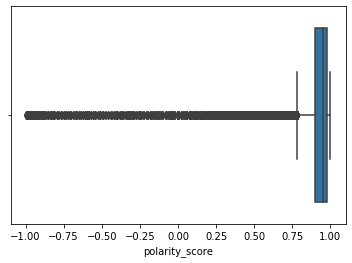

In [154]:
#Boxplot the compound polarity scores
sns.boxplot(x=reviews['polarity_score'])

In [155]:
#Printing the positive compound polarity scores
print('Positive compound scores:', reviews['polarity_score'][reviews['polarity_score']>0].count())

Positive compound scores: 82719


In [156]:
#Printing the negative compound polarity scores
print('Negative compound scores:', reviews['polarity_score'][reviews['polarity_score']<0].count())

Negative compound scores: 1364


In [157]:
#Printing the Neutral compound polarity scores
print('Neutral compound scores:', reviews['polarity_score'][reviews['polarity_score']==0].count())

Neutral compound scores: 766


In [158]:
#Grouping the compound polarity score for the review comments by neighbourhood_cleansed and sorting the score by top 10
reviews.groupby(['neighbourhood_cleansed'])[['polarity_score']].mean().sort_values(by = 'polarity_score', ascending = False).head(10)

,polarity_score
neighbourhood_cleansed,
Roxhill,0.956814
Cedar Park,0.940413
Pinehurst,0.934920
Windermere,0.934858
Arbor Heights,0.926676
Whittier Heights,0.919565
Sunset Hill,0.916134
Meadowbrook,0.915261
Southeast Magnolia,0.914858


In [159]:
#Checking the vibe of each neighbourhood takes one neighbourhood as a time in string value
def checkneighbourhood(neighbourhood):
    '''
    Function to check neighbourhood wordcloud
    INPUT:
    neighbourhood - the neighbourhood to visualise
    OUTPUT:
    wordcloud visualisation of comments
    
    Helps to map each listing_id to it's respective neighbourhood in order to associate reviews with neighbourhoods
    '''
    review = reviews.copy()
    review = review.set_index('neighbourhood_cleansed')
    return show_wordcloud(review.loc[[neighbourhood]]['comments_clean'])




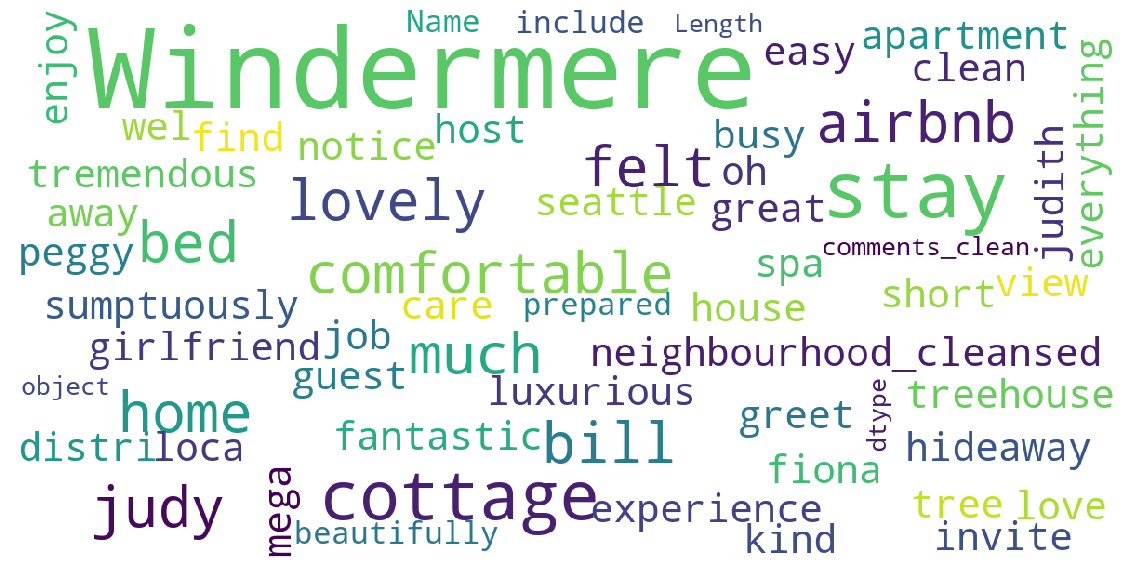

In [160]:
#Checking the vibe of each neighbourhood takes one neighbourhood as a time in string value
checkneighbourhood('Windermere')

In [161]:
#Grouping the compound polarity score for the review comments by neighbourhood_cleansed and sorting the score by bottom 10
reviews.groupby(['neighbourhood_cleansed'])[['polarity_score']].mean().sort_values(by = 'polarity_score', ascending = True).head(10)

,polarity_score
neighbourhood_cleansed,
Holly Park,0.763683
View Ridge,0.812586
University District,0.822695
North Beach/Blue Ridge,0.830413
Mid-Beacon Hill,0.842660
South Beacon Hill,0.843056
Seaview,0.850103
Westlake,0.851228
Industrial District,0.851883


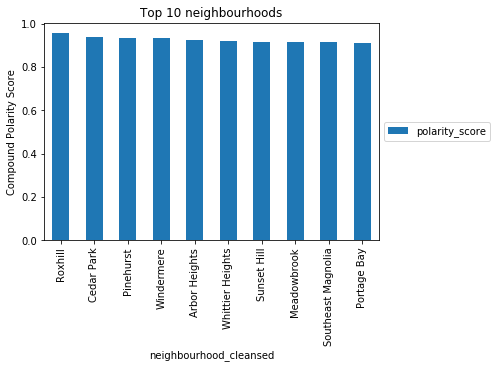

In [162]:
#plotting top 10 neighbourhood with highest compound polarity score in descending

reviews.groupby(['neighbourhood_cleansed'])[['polarity_score']].mean().sort_values(by = 'polarity_score', ascending = False).head(10).plot(kind = 'bar')
plt.ylabel('Compound Polarity Score')
plt.title('Top 10 neighbourhoods')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))



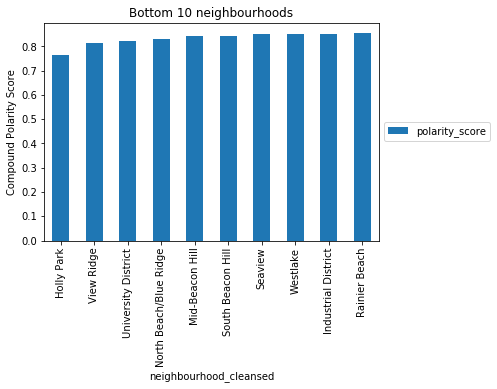

In [163]:
#plotting bottom 10 neighbourhood with highest compound polarity score in ascending

reviews.groupby(['neighbourhood_cleansed'])[['polarity_score']].mean().sort_values(by = 'polarity_score', ascending = True).head(10).plot(kind = 'bar')
plt.ylabel('Compound Polarity Score')
plt.title('Bottom 10 neighbourhoods')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [164]:
#Exploring the percentage null values in host_is_superhost field
listings['host_is_superhost'].isnull().mean()

0.0005238344683080147

In [165]:
#Exploring the security_deposit field
listings['security_deposit'].head()

0          NaN
1      $100.00
2    $1,000.00
3          NaN
4      $700.00
Name: security_deposit, dtype: object

In [166]:
#Exploring which fields have more than 25% missing data
set(listings.columns[listings.isnull().mean() > 0.25])

{'cleaning_fee',
 'license',
 'monthly_price',
 'neighborhood_overview',
 'notes',
 'security_deposit',
 'square_feet',
 'weekly_price'}

In [167]:
#Converting the cleaning_fee column from string to float for analysis
listings['cleaning_fee'] = listings['cleaning_fee'].str.replace('$', '').str.replace(',','').astype(float).fillna(0)

In [168]:
listings['cleaning_fee'].head()

0      0.0
1     40.0
2    300.0
3      0.0
4    125.0
Name: cleaning_fee, dtype: float64

In [169]:
#Converting the security_deposit column from string to float for analysis
listings['security_deposit'] = listings['security_deposit'].str.replace(',', '').str.replace('$', '').astype(float).fillna(0)

In [170]:
#Exploring the percentage null values in notes field

listings['notes'].isnull().mean()

0.42063907805133577

In [171]:
#Exploring the percentage null values in license field
listings['license'].isnull().mean()

1.0

In [172]:
#Exploring the percentage null values in square_feet field

listings['square_feet'].isnull().mean()

0.9745940282870613

In [173]:
#Exploring the percentage null values in monthly_price field

listings['monthly_price'].isnull().mean()

0.6026715557883708

In [174]:
#Exploring the values in calendar_updated field

listings['calendar_updated'].value_counts().head(10)


today           706
2 weeks ago     347
3 weeks ago     300
2 months ago    281
a week ago      248
yesterday       231
3 months ago    218
4 weeks ago     213
3 days ago      162
5 weeks ago     156
Name: calendar_updated, dtype: int64

In [175]:
#Exploring the values in host_location field

listings['host_location'].value_counts()

Seattle, Washington, United States        3259
US                                         246
Spokane, Washington, United States          41
Kent, Washington, United States             34
Los Angeles, California, United States      13
                                          ... 
Massachusetts, United States                 1
Addison, Texas, United States                1
Gosnold, Massachusetts, United States        1
Las Vegas, Nevada, United States             1
San Jose, California, United States          1
Name: host_location, Length: 120, dtype: int64

In [176]:
#Cleaning the listings dataset by dropping columns we wont need
listings_clean = listings.drop(['name', 'host_acceptance_rate', 'requires_license', 'has_availability', 'host_verifications', 'neighbourhood_cleansed', 'jurisdiction_names' ,'first_review', 'smart_location', 'state', 'market', 'neighbourhood', 'host_url', 'license', 'monthly_price', 'square_feet', 'weekly_price', 'last_review', 'id', 'street','longitude', 'zipcode', 'latitude', 'city', 'last_scraped','availability_60', 'availability_30', 'availability_90', 'calendar_last_scraped', 'country_code', 'scrape_id', 'host_id', 'availability_365', 'calendar_updated', 'host_location', 'host_name','country', 'host_neighbourhood','host_since'], axis=1)

In [177]:
#Exploring the values in transit field

listings['transit'].value_counts()

Convenient public transportation. The locations of our properties are ideal for guests who prefer to travel without a car.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      32
(URL HIDDEN)                                                                                                                                                                                                                                                                                                                         

In [178]:
#Exploring the percentage null values in host_thumbnail_url field

listings['host_thumbnail_url'].isnull().mean()

0.0005238344683080147

In [179]:
#Exploring the values in market field

listings['market'].value_counts()

Seattle    3818
Name: market, dtype: int64

In [180]:
#Exploring the values in smart_location field
listings['smart_location'].value_counts()

Seattle, WA                  3810
West Seattle, WA                2
Seattle , WA                    2
Phinney Ridge Seattle, WA       1
seattle, wa                     1
西雅图, WA                         1
Ballard, Seattle, WA            1
Name: smart_location, dtype: int64

In [181]:
#Exploring the values in first_review field
listings['first_review'].value_counts()

2015-09-21    25
2015-12-01    22
2015-07-27    22
2015-06-14    21
2015-08-23    20
              ..
2015-04-14     1
2012-03-24     1
2013-10-15     1
2011-11-09     1
2015-11-03     1
Name: first_review, Length: 984, dtype: int64

In [182]:
text_fields = ['listing_url','summary','space','notes','transit','description','description','experiences_offered','neighborhood_overview','notes','transit','thumbnail_url','medium_url','picture_url', 'xl_picture_url', 'host_about', 'host_thumbnail_url','host_picture_url', 'amenities']



listings_clean[text_fields] = listings_clean[text_fields].notnull().apply(lambda x: x.astype('category').cat.codes)



In [183]:
listings_clean.transit.dtype

dtype('int8')

In [184]:
listings_clean['notes'].value_counts()

1    2212
0    1606
Name: notes, dtype: int64

In [185]:
listings_clean.head()

,listing_url,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,0,0,1,0,0,0,0,0,0,0,...,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,0,1,1,0,0,1,1,1,1,1,...,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
2,0,1,1,0,0,1,1,1,0,0,...,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15
3,0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,f,flexible,f,f,1,NaN
4,0,1,1,0,0,1,1,1,0,0,...,10.0,10.0,9.0,9.0,f,strict,f,f,1,0.89


In [186]:
#Exploring the values in property_type field

listings_clean['property_type'].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [187]:
#Exploring the values in require_guest_profile_picture field

listings_clean['require_guest_profile_picture'].value_counts()

f    3497
t     321
Name: require_guest_profile_picture, dtype: int64

In [188]:
#Cleaning the extra_people field by making the price charge a float from a string

listings_clean['extra_people'] = listings_clean['extra_people'].str.replace('$', '').str.replace(',', '').astype(float).fillna(0)

In [189]:
#Cleaning the property type field by changing the property types with less than 10 records to "other" types

listings_clean['property_type'] = listings_clean['property_type'].str.replace('Boat', 'Other').str.replace('Tent', 'Other').str.replace('Treehouse', 'Other').str.replace('Chalet', 'Other').str.replace('Dorm', 'Other').str.replace('Yurt', 'Other')

listings_clean['property_type'].value_counts()



House              1733
Apartment          1708
Townhouse           118
Condominium          91
Other                43
Loft                 40
Bed & Breakfast      37
Cabin                21
Bungalow             13
Camper/RV            13
Name: property_type, dtype: int64

In [190]:
#Creating a list of boolean fields in the listings dataset
bool_fields = ['host_is_superhost','host_response_time', 'host_has_profile_pic','host_identity_verified','neighbourhood_group_cleansed','is_location_exact','property_type','room_type','bed_type','instant_bookable','cancellation_policy','require_guest_profile_picture','require_guest_phone_verification']


In [191]:
#Converting boolean fields to category codes

listings_clean[bool_fields]= listings_clean[bool_fields].apply(lambda x: x.astype('category').cat.codes)

In [192]:
#Reviewing datatypes of our columns

listings_clean.dtypes

listing_url                            int8
summary                                int8
space                                  int8
description                            int8
experiences_offered                    int8
neighborhood_overview                  int8
notes                                  int8
transit                                int8
thumbnail_url                          int8
medium_url                             int8
picture_url                            int8
xl_picture_url                         int8
host_about                             int8
host_response_time                     int8
host_response_rate                   object
host_is_superhost                      int8
host_thumbnail_url                     int8
host_picture_url                       int8
host_listings_count                 float64
host_total_listings_count           float64
host_has_profile_pic                   int8
host_identity_verified                 int8
neighbourhood_group_cleansed    

In [193]:
#Converting host_response_rate field to float

listings_clean['host_response_rate']= listings_clean['host_response_rate'].astype(str).str.replace('%', '').astype(float).fillna(0)

In [194]:
#Creating a set of list of columns that contain missing data

set(listings_clean.columns[listings_clean.isnull().mean() > 0])

{'bathrooms',
 'bedrooms',
 'beds',
 'host_listings_count',
 'host_total_listings_count',
 'review_scores_accuracy',
 'review_scores_checkin',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
 'review_scores_value',
 'reviews_per_month'}

In [195]:
#cleaning specific columns with na data with 0 as its the closest thing to NaN for these types of dataset

list_to_convert = ['bathrooms',
 'bedrooms',
 'beds',
 'host_listings_count',
 'host_total_listings_count',
 'review_scores_accuracy',
 'review_scores_checkin',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
 'review_scores_value',
 'reviews_per_month']

listings_clean[list_to_convert]= listings_clean[list_to_convert].fillna(0)
               
               
               
               

In [196]:
set(listings_clean.columns[listings_clean.isnull().mean() > 0])

set()

In [197]:
# Build out X and y, y to be price column and X to be all the other columns
y_column = listings_clean['price']
x_columns = listings_clean.drop(['price'], axis=1)

In [198]:
# Create train and test data sets
X_train, X_test, y_train, y_test = train_test_split(x_columns, y_column, test_size = .30, random_state=42) 

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2672, 52) (2672,)
(1146, 52) (1146,)


In [199]:
# Instantiate linear regression model and fit it to training data set
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 
        
# Predict and score the model
y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test) 
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test,y_test_preds)
print("The rsquared score on the training data was {}.  The rsquared score on the test data was {}.".format(train_score, test_score))

The rsquared score on the training data was 0.5667765219606975.  The rsquared score on the test data was 0.5800564841142672.


In [200]:
# Function to extract coefficients of linear model
def coef_weights(coefficients, X_train):
    '''
    Function to get coefficients back for each of the features
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Applying the function
coef_df = coef_weights(lm_model.coef_, X_train)

#Exploring the top coefficient values
coef_df.sort_values(by='coefs', ascending = False).head(20)

,est_int,coefs,abs_coefs
10,picture_url,2.610893e+14,2.610893e+14
9,medium_url,2.047957e+14,2.047957e+14
17,host_picture_url,1.763139e+14,1.763139e+14
31,amenities,1.474986e+14,1.474986e+14
11,xl_picture_url,1.330891e+14,1.330891e+14
4,experiences_offered,1.240085e+14,1.240085e+14
19,host_total_listings_count,3.859006e+11,3.859006e+11
27,bathrooms,2.585895e+01,2.585895e+01
28,bedrooms,2.143578e+01,2.143578e+01
15,host_is_superhost,1.218721e+01,1.218721e+01


In [201]:
#Exploring the top coefficient values
coef_df.sort_values(by='coefs', ascending = False).head(20)

,est_int,coefs,abs_coefs
10,picture_url,2.610893e+14,2.610893e+14
9,medium_url,2.047957e+14,2.047957e+14
17,host_picture_url,1.763139e+14,1.763139e+14
31,amenities,1.474986e+14,1.474986e+14
11,xl_picture_url,1.330891e+14,1.330891e+14
4,experiences_offered,1.240085e+14,1.240085e+14
19,host_total_listings_count,3.859006e+11,3.859006e+11
27,bathrooms,2.585895e+01,2.585895e+01
28,bedrooms,2.143578e+01,2.143578e+01
15,host_is_superhost,1.218721e+01,1.218721e+01


In [202]:
# Dropping columns with lowest coefficient value
listings_new = listings_clean.drop(['listing_url', 'summary', 'space', 'description',
                                    'notes', 'thumbnail_url',
                                    'medium_url', 'picture_url', 'xl_picture_url', 'host_about',
                                    'host_thumbnail_url', 'host_picture_url'], axis =1)

In [203]:
# Build out X and y, y to be price column and X to be all the other columns
y_column_new = listings_new['price']
x_columns_new = listings_new.drop(['price'], axis=1)

In [204]:
# Create train and test data sets

X2_train, X2_test, y2_train, y2_test = train_test_split(x_columns_new, y_column_new, test_size = .30, random_state=42) 

print(X2_train.shape, y2_train.shape)
print(X2_test.shape, y2_test.shape)

(2672, 40) (2672,)
(1146, 40) (1146,)


In [205]:
# Instantiate linear regression model and fit it to training data set

lm_model = LinearRegression(normalize=True) 
lm_model.fit(X2_train, y2_train) 
        
# Predict and score the model
y2_train_preds = lm_model.predict(X2_train)
y2_test_preds = lm_model.predict(X2_test) 
train_score2 = r2_score(y2_train, y2_train_preds)
test_score2 = r2_score(y2_test,y2_test_preds)
print("The rsquared score on the training data was {}.  The rsquared score on the test data was {}.".format(train_score, test_score))

The rsquared score on the training data was 0.5667765219606975.  The rsquared score on the test data was 0.5800564841142672.


In [206]:

def coef_weights2(coefficients, X2_train):
    '''
    Function to get coefficients back for each of the features
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs2_df = pd.DataFrame()
    coefs2_df['est_int'] = X2_train.columns
    coefs2_df['coefs'] = lm_model.coef_
    coefs2_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs2_df = coefs2_df.sort_values('abs_coefs', ascending=False)
    return coefs2_df

#Use the function
coef2_df = coef_weights2(lm_model.coef_, X2_train)

#A quick look at the top results
coef2_df.sort_values(by='coefs', ascending = False).head(20)

,est_int,coefs,abs_coefs
15,bathrooms,2.645059e+01,2.645059e+01
16,bedrooms,2.145338e+01,2.145338e+01
5,host_is_superhost,1.185075e+01,1.185075e+01
36,require_guest_profile_picture,1.012948e+01,1.012948e+01
14,accommodates,9.058790e+00,9.058790e+00
32,review_scores_location,6.988245e+00,6.988245e+00
28,review_scores_accuracy,3.750772e+00,3.750772e+00
8,host_has_profile_pic,2.647372e+00,2.647372e+00
11,is_location_exact,2.336238e+00,2.336238e+00
22,guests_included,1.950911e+00,1.950911e+00


In [207]:
#A quick look at the bottom results
coef2_df.sort_values(by='coefs', ascending = True).head(20)

,est_int,coefs,abs_coefs
13,room_type,-2.809142e+01,2.809142e+01
1,neighborhood_overview,-8.661122e+00,8.661122e+00
33,review_scores_value,-7.057934e+00,7.057934e+00
37,require_guest_phone_verification,-6.223214e+00,6.223214e+00
30,review_scores_checkin,-5.378801e+00,5.378801e+00
3,host_response_time,-4.404800e+00,4.404800e+00
39,reviews_per_month,-2.089520e+00,2.089520e+00
35,cancellation_policy,-1.348422e+00,1.348422e+00
12,property_type,-9.494927e-01,9.494927e-01
10,neighbourhood_group_cleansed,-8.199038e-01,8.199038e-01
